In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import pandas_profiling

In [ ]:
# Cargar el dataframe
df = pd.read_csv("dataset_transformed.csv")

# Visualizar las primeras filas del dataframe
print(df.head())

# Obtener información general sobre el dataframe
print(df.info())

# Estadísticas descriptivas de variables numéricas
print(df.describe())

# Conteo de valores únicos en cada columna
print(df.nunique())

# Visualizar la matriz de correlación
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Matriz de correlación")
plt.show()

# Histograma de la variable 'budget'
plt.hist(df['budget'], bins=10, edgecolor='black')
plt.xlabel('Budget')
plt.ylabel('Count')
plt.title('Distribución del presupuesto')
plt.show()

# Gráfico de barras de los géneros más frecuentes
genre_counts = df['genres'].explode().value_counts().head(10)
plt.bar(genre_counts.index, genre_counts.values)
plt.xticks(rotation=45)
plt.xlabel('Género')
plt.ylabel('Count')
plt.title('Géneros más frecuentes')
plt.show()

# Boxplot del ingreso (revenue) por año de lanzamiento (release_year)
sns.boxplot(x=df['release_year'], y=df['revenue'])
plt.xticks(rotation=90)
plt.xlabel('Año de lanzamiento')
plt.ylabel('Ingreso')
plt.title('Ingreso por año de lanzamiento')
plt.show()

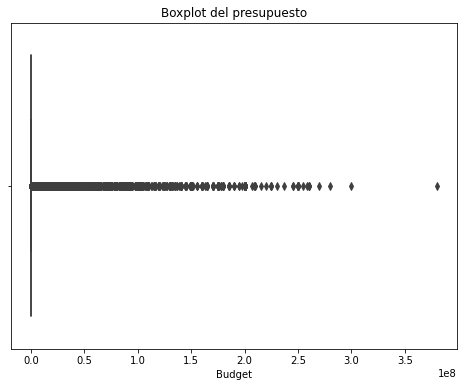

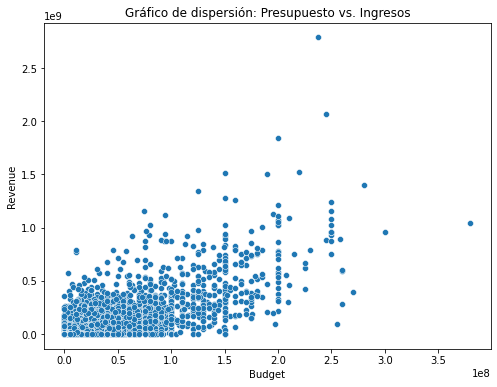

Valores atípicos en el presupuesto:
      belongs_to_collection      budget  \
0      Toy Story Collection  30000000.0   
1                       NaN  65000000.0   
3                       NaN  16000000.0   
5                       NaN  60000000.0   
6                       NaN  58000000.0   
...                     ...         ...   
45314                   NaN   2000000.0   
45320                   NaN   2000000.0   
45321                   NaN    800000.0   
45323                   NaN   2000000.0   
45333                   NaN   5000000.0   

                                                  genres      id  \
0      [{'id': 16, 'name': 'Animation'}, {'id': 35, '...     862   
1      [{'id': 12, 'name': 'Adventure'}, {'id': 14, '...    8844   
3      [{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...   31357   
5      [{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...     949   
6      [{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...   11860   
...                                    

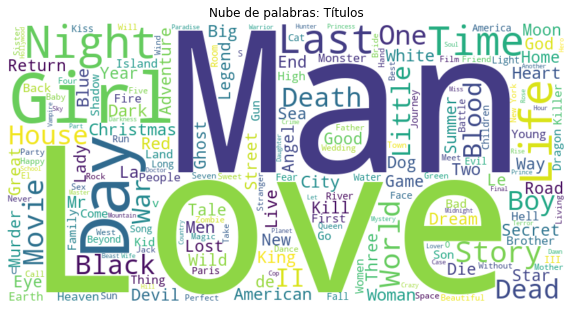

In [3]:


# Boxplot del presupuesto (budget)
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='budget')
plt.xlabel('Budget')
plt.title('Boxplot del presupuesto')
plt.show()

# Gráfico de dispersión entre el presupuesto y los ingresos (budget y revenue)
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='budget', y='revenue')
plt.xlabel('Budget')
plt.ylabel('Revenue')
plt.title('Gráfico de dispersión: Presupuesto vs. Ingresos')
plt.show()

# Cálculo de valores atípicos en el presupuesto utilizando el método de Tukey
Q1 = df['budget'].quantile(0.25)
Q3 = df['budget'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df[(df['budget'] < lower_bound) | (df['budget'] > upper_bound)]
print('Valores atípicos en el presupuesto:')
print(outliers)

# Nube de palabras de los títulos


title_text = ' '.join(df['title'].dropna().values)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(title_text)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nube de palabras: Títulos')
plt.show()


In [5]:
profile = df.profile_report(title='Pandas Profiling Report')
profile.to_file(output_file='report.html')

Summarize dataset:  58%|█████▊    | 14/24 [00:05<00:04,  2.23it/s, Describe variable:vote_average]c:\Python310\lib\site-packages\numpy\core\_methods.py:233: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
c:\Python310\lib\site-packages\numpy\core\_methods.py:233: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
Summarize dataset:  77%|███████▋  | 20/26 [00:06<00:01,  4.58it/s, Calculate auto correlation]    C:\Users\Martín\AppData\Roaming\Python\Python310\site-packages\pandas_profiling\model\correlations.py:67: UserWarning: There was an attempt to calculate the auto correlation, but this failed.
To hide this warning, disable the calculation
(using `df.profile_report(correlations={"auto": {"calculate": False}})`
If this is problematic for your use case, please report this as an issue:
https://github.com/ydataai/pandas-profiling/issues
(include the error message: 'cannot specify integer `bins` when input data cont

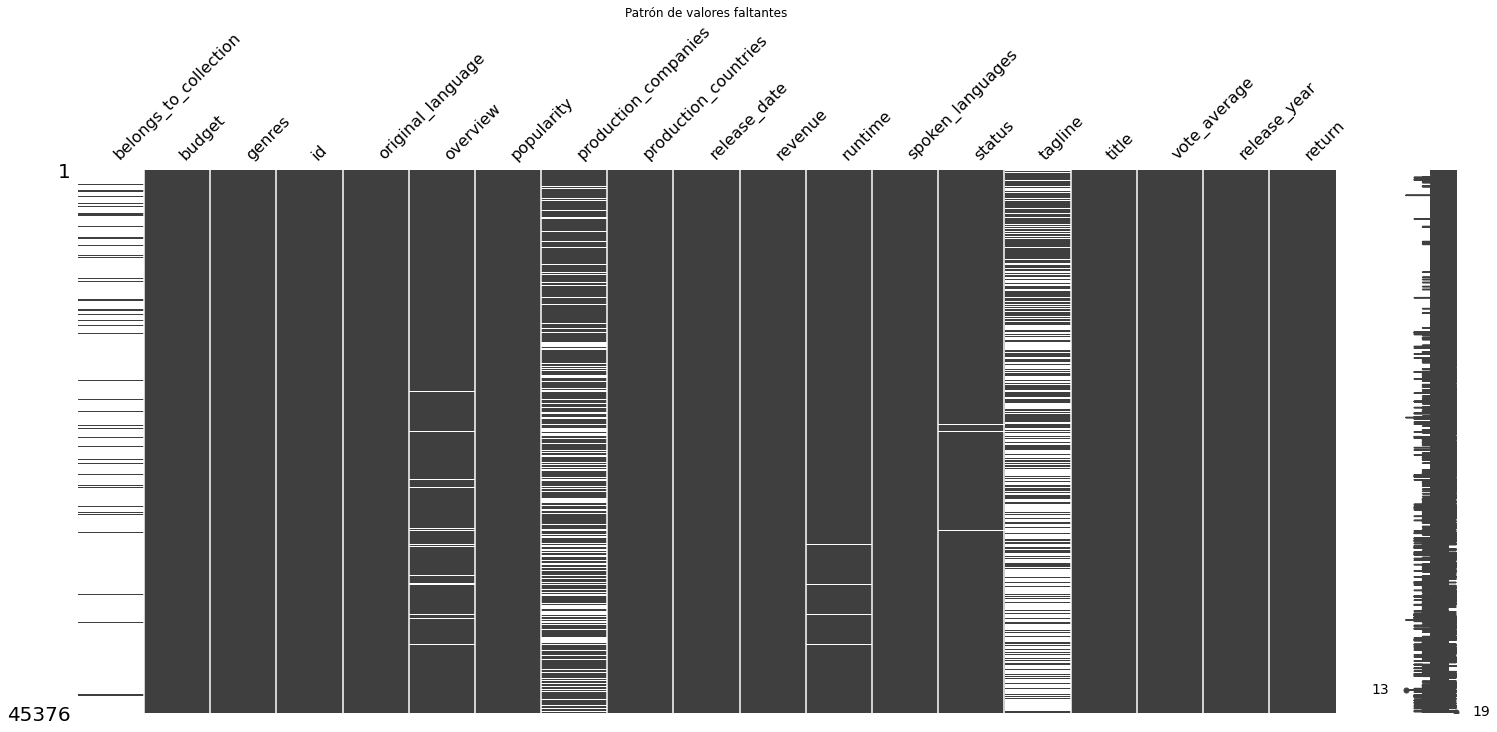

In [6]:
import missingno as msno

msno.matrix(df)
plt.title('Patrón de valores faltantes')
plt.show()
